# Summarize experiment results

Mamie Wang 2020/06/22

In [3]:
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import cm

In [4]:
def summarize_perf(paths):
    df = pd.DataFrame()
    for path in paths:
        perf_metrics = pd.read_csv(path)
        perf_metrics = perf_metrics.loc[:, ["method", "threshold", "runtime", "RF", "F1"]]
        has_threshold = (perf_metrics.threshold != 0) & (perf_metrics.threshold != "None")
        perf_metrics.loc[has_threshold,'method'] = perf_metrics.loc[has_threshold,'method'] + " (" + perf_metrics.loc[has_threshold,'threshold'].astype(float).astype(int).astype(str) + ")"
        perf_metrics = perf_metrics.loc[:, ["method", "runtime", "RF", "F1"]]
        df = df.append(perf_metrics)
    perf_summarized = df.groupby("method").agg(['mean', 'std']).round(2).sort_values([('F1', 'mean'), ("runtime", "mean")], ascending=[False, True])
    return df, perf_summarized

In [3]:
binary_perf_path = "results/binary_angle_512.csv"
catepillar_perf_path = "results/catepillar_angle_512.csv"
h1n1_path = "results/H1N1_angle_288.csv"
h3n2_path = "results/H3N2_angle_565.csv"

In [11]:
metrics, summarized = summarize_perf([binary_perf_path])
summarized

runtime          RF            F1      
                   mean   std  mean   std    mean   std
method                                                 
RaXML            238.91  4.39   0.0  0.00  100.00  0.00
STR+RaXML (256)  211.06  3.15   1.0  1.41   99.95  0.07
STR+RaXML (128)  166.03  2.95   4.8  4.73   99.77  0.23
STR+NJ (128)      18.72  0.26   5.4  4.33   99.74  0.21
STR+NJ (256)      22.16  0.17   5.4  2.84   99.74  0.14
SNJ               40.33  0.77   6.6  2.84   99.68  0.14
STR+NJ (64)       17.77  0.20   7.8  4.16   99.62  0.20
STR+SNJ (256)     25.73  0.59   8.4  5.95   99.59  0.29
NJ                37.57  1.17   9.0  5.10   99.56  0.25
STR+SNJ (128)     20.34  0.42  10.2  8.87   99.50  0.43
STR+RaXML (64)    98.51  1.96  10.8  7.73   99.47  0.38
STR+SNJ (64)      18.66  0.24  16.6  6.54   99.19  0.32

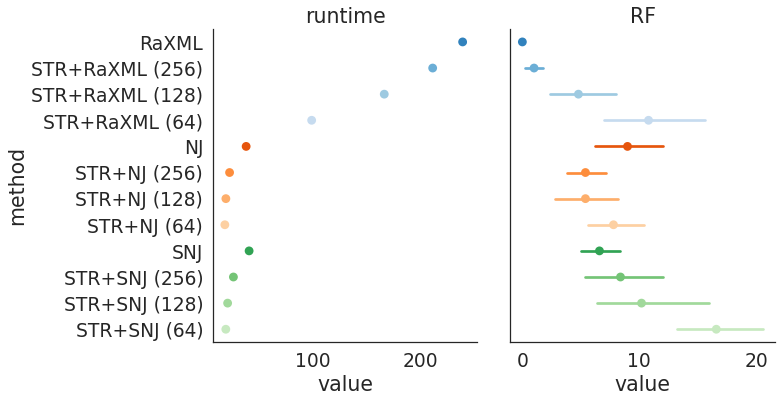

In [22]:
cmap = cm.get_cmap("tab20c", 20)
colors = [cmap(i) for i in range(12)]
ordering = ["RaXML", "STR+RaXML (256)", "STR+RaXML (128)", "STR+RaXML (64)", 
                        "NJ", "STR+NJ (256)", "STR+NJ (128)", "STR+NJ (64)", 
                        "SNJ", "STR+SNJ (256)", "STR+SNJ (128)", "STR+SNJ (64)"]
color_dict = dict(zip(ordering, colors))

metrics_long = pd.melt(metrics, id_vars = ["method"], var_name = "performance")
sns.set(style = "white", font_scale = 1.7)
g = sns.catplot(data = metrics_long, x = "value", y = "method", hue = "method", 
                order = ordering,
           col = "performance", legend = True, kind = "point", sharey = True, sharex = False, height = 6,
               palette = color_dict).set_titles("{col_name}")
g = g._legend.remove()
g
plt.savefig('../../spec_tree/figs/binary_performance.eps', bbox_inches = 'tight',
    pad_inches = 0)

In [27]:
metrics, summarized = summarize_perf([catepillar_perf_path])
metrics = metrics.iloc[:,0:3]
summarized

runtime             RF              F1      
                   mean    std    mean     std    mean   std
method                                                      
STR+RaXML (64)    91.05   1.29     0.0    0.00  100.00  0.00
STR+SNJ (64)      21.63   0.43     2.2    1.99   99.89  0.10
STR+SNJ (128)     23.82   0.78     2.8    2.35   99.86  0.11
STR+SNJ (256)     40.41   7.20     5.0    5.19   99.76  0.25
SNJ              295.31  36.78    14.4    6.79   99.30  0.33
STR+RaXML (128)   99.93   3.45    35.2   74.42   98.28  3.64
STR+NJ (64)       20.79   0.41    79.2   28.65   96.13  1.40
STR+RaXML (256)  126.29  25.19   236.4  201.88   88.43  9.88
STR+NJ (128)      21.07   0.36   361.6   73.40   82.31  3.59
STR+NJ (256)      23.45   0.89   743.2  103.88   63.64  5.08
RaXML            225.30  86.84   746.0  135.98   63.50  6.65
NJ                43.28   1.31  1000.4   25.78   51.06  1.26

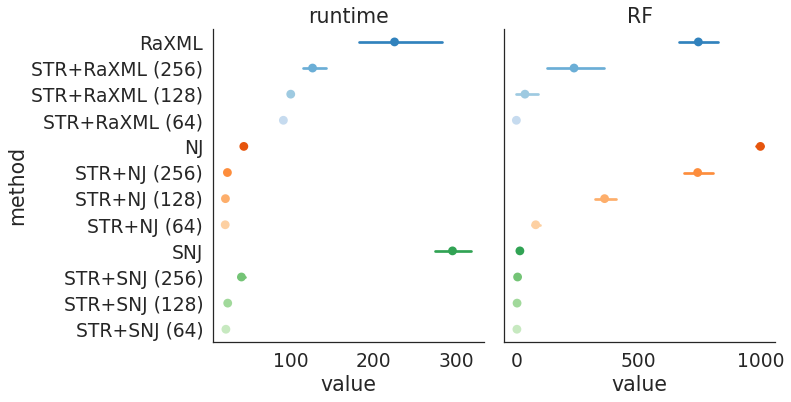

In [28]:
cmap = cm.get_cmap("tab20c", 20)
colors = [cmap(i) for i in range(12)]
ordering = ["RaXML", "STR+RaXML (256)", "STR+RaXML (128)", "STR+RaXML (64)", 
                        "NJ", "STR+NJ (256)", "STR+NJ (128)", "STR+NJ (64)", 
                        "SNJ", "STR+SNJ (256)", "STR+SNJ (128)", "STR+SNJ (64)"]
color_dict = dict(zip(ordering, colors))

metrics_long = pd.melt(metrics, id_vars = ["method"], var_name = "performance")
sns.set(style = "white", font_scale = 1.7)
g = sns.catplot(data = metrics_long, x = "value", y = "method", hue = "method", 
                order = ordering,
           col = "performance", legend = True, kind = "point", sharey = True, sharex = False, height = 6,
               palette = color_dict).set_titles("{col_name}")
g = g._legend.remove()
g
plt.savefig('../../spec_tree/figs/catepillar_performance.eps', bbox_inches = 'tight',
    pad_inches = 0)

In [30]:
metrics, summarized = summarize_perf([h1n1_path])
metrics = metrics.iloc[:,0:3]
summarized

runtime            RF            F1      
                     mean    std   mean    std   mean   std
method                                                     
RaXML              172.15   5.78   39.2   3.55  96.59  0.31
NJ                  15.26   0.30   63.8   9.95  94.44  0.87
STR + RaXML (128)   99.92  15.95   82.8  20.49  92.79  1.78
STR + NJ (128)      14.67   0.92  100.0  21.17  91.29  1.84
STR + RaXML (64)    45.75   4.31  117.8  50.07  89.74  4.36
STR + NJ (64)       14.53   0.61  119.4  25.49  89.60  2.22
STR + SNJ (64)      15.05   0.58  134.0  23.23  88.33  2.02
STR + RaXML (32)    26.98   1.30  135.2  42.53  88.22  3.70
STR + SNJ (128)     15.22   0.84  144.6  21.25  87.40  1.85
SNJ                 17.40   0.40  154.6  12.33  86.53  1.07
STR + NJ (32)       14.72   0.72  156.8  38.52  86.34  3.36
STR + SNJ (32)      14.77   0.86  162.8  36.05  85.82  3.14

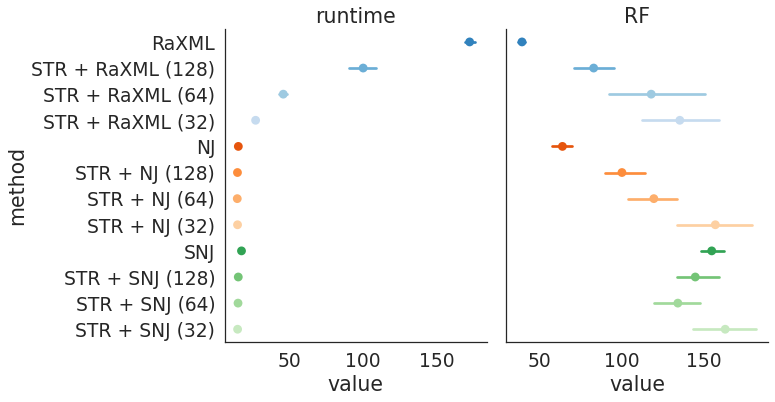

In [31]:
cmap = cm.get_cmap("tab20c", 20)
colors = [cmap(i) for i in range(12)]
ordering = ["RaXML", "STR + RaXML (128)", "STR + RaXML (64)", "STR + RaXML (32)", 
                        "NJ", "STR + NJ (128)", "STR + NJ (64)", "STR + NJ (32)", 
                        "SNJ", "STR + SNJ (128)", "STR + SNJ (64)", "STR + SNJ (32)"]
color_dict = dict(zip(ordering, colors))

metrics_long = pd.melt(metrics, id_vars = ["method"], var_name = "performance")
sns.set(style = "white", font_scale = 1.7)
g = sns.catplot(data = metrics_long, x = "value", y = "method", hue = "method", 
                order = ordering,
           col = "performance", legend = True, kind = "point", sharey = True, sharex = False, height = 6,
               palette = color_dict).set_titles("{col_name}")
g = g._legend.remove()
g
plt.savefig('../../spec_tree/figs/H1N1_performance.eps', bbox_inches = 'tight',
    pad_inches = 0)

In [32]:
metrics, summarized = summarize_perf([h3n2_path])
metrics = metrics.iloc[:,0:3]
summarized

runtime            RF            F1      
                     mean    std   mean    std   mean   std
method                                                     
RaXML              443.80  14.98  100.4  13.75  95.55  0.61
STR + RaXML (256)  286.27  20.84  129.0  18.89  94.28  0.84
STR + NJ (256)      53.86   1.39  156.8  25.30  93.05  1.12
STR + RaXML (128)  212.32  13.39  186.4  32.68  91.74  1.45
NJ                  72.36   1.06  192.0  18.06  91.49  0.80
STR + NJ (128)      55.04   2.30  225.6  30.45  90.00  1.35
STR + NJ (64)       54.76   1.05  228.8  30.14  89.86  1.34
STR + RaXML (64)   113.89   7.22  268.4  50.63  88.10  2.24
STR + SNJ (256)     56.87   2.28  286.4  31.20  87.30  1.38
STR + SNJ (128)     55.10   1.73  308.0  59.37  86.35  2.63
STR + SNJ (64)      56.45   2.77  322.6  33.32  85.70  1.48
SNJ                 74.80   1.14  339.2  15.61  84.96  0.69

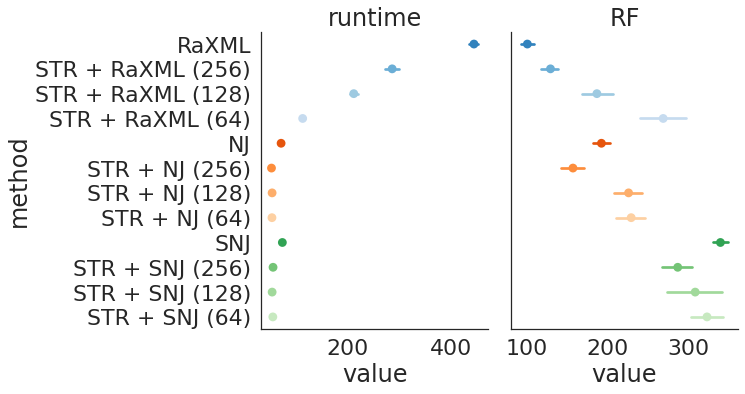

In [33]:
cmap = cm.get_cmap("tab20c", 20)
colors = [cmap(i) for i in range(12)]
ordering = ["RaXML", "STR + RaXML (256)", "STR + RaXML (128)", "STR + RaXML (64)", 
                        "NJ", "STR + NJ (256)", "STR + NJ (128)", "STR + NJ (64)", 
                        "SNJ", "STR + SNJ (256)", "STR + SNJ (128)", "STR + SNJ (64)"]
color_dict = dict(zip(ordering, colors))

metrics_long = pd.melt(metrics, id_vars = ["method"], var_name = "performance")
sns.set(style = "white", font_scale = 2)
g = sns.catplot(data = metrics_long, x = "value", y = "method", hue = "method", 
                order = ordering,
           col = "performance", legend = True, kind = "point", sharey = True, sharex = False, height = 6,
               palette = color_dict).set_titles("{col_name}")
g = g._legend.remove()
g
plt.savefig('../../spec_tree/figs/H3N2_performance.eps', bbox_inches = 'tight',
    pad_inches = 0)

## Kingman Tree of size 2000

In [1]:
import glob
files = glob.glob("results/kingman_*")

In [5]:
metrics, summarized = summarize_perf(files)
metrics = metrics.iloc[:,0:3]

summarized

/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


runtime              RF            F1      
                    mean     std    mean    std   mean   std
method                                                      
STR+SNJ (128)     380.10    1.49  2477.6  59.42  69.01  0.74
STR+SNJ (256)     401.46    3.50  2518.4  69.48  68.50  0.87
STR+SNJ (64)      376.09    5.41  2571.6  32.78  67.84  0.41
SNJ              1461.75   11.01  2662.8  19.16  66.70  0.24
STR+RaXML (256)   472.28    8.89  2935.6  37.64  63.29  0.47
STR+RaXML (64)    403.91    2.47  2976.8  44.67  62.77  0.56
RaXML            1572.96  304.47  2977.6  46.63  62.76  0.58
NJ               1907.79   65.19  3026.8  27.91  62.15  0.35
STR+RaXML (128)   425.87    5.87  3063.6  43.00  61.69  0.54
STR+NJ (64)       358.24    2.67  3072.8  16.41  61.57  0.21
STR+NJ (256)      376.76    1.92  3082.8  77.53  61.45  0.97
STR+NJ (128)      390.66    2.19  3087.2  47.72  61.39  0.60

In [6]:
metrics["method"] = metrics["method"].str.replace("[+]", " + ", case = False)

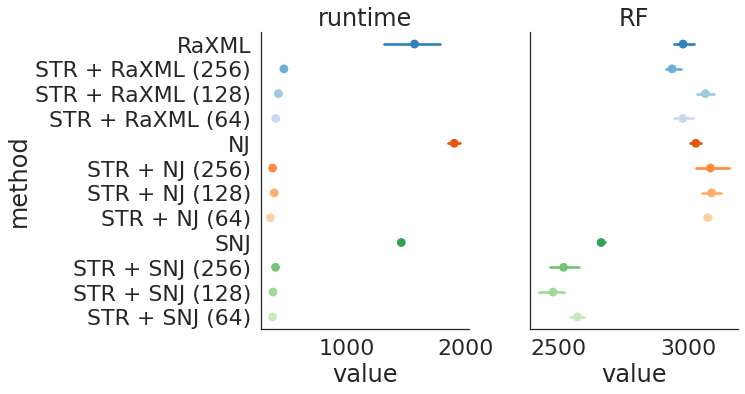

In [8]:

cmap = cm.get_cmap("tab20c", 20)
colors = [cmap(i) for i in range(12)]
ordering = ["RaXML", "STR + RaXML (256)", "STR + RaXML (128)", "STR + RaXML (64)", 
            "NJ", "STR + NJ (256)", "STR + NJ (128)", "STR + NJ (64)", 
            "SNJ", "STR + SNJ (256)", "STR + SNJ (128)", "STR + SNJ (64)"]
color_dict = dict(zip(ordering, colors))

metrics_long = pd.melt(metrics, id_vars = ["method"], var_name = "performance")
sns.set(style = "white", font_scale = 2)
g = sns.catplot(data = metrics_long, x = "value", y = "method", hue = "method", 
                order = ordering,
           col = "performance", legend = True, kind = "point", sharey = True, sharex = False, height = 6,
               palette = color_dict).set_titles("{col_name}")
g = g._legend.remove()
g
plt.savefig('../../spec_tree/figs/kingman_2000_performance.eps', bbox_inches = 'tight',
    pad_inches = 0)

# Binary trees of size 4096

In [2]:
NJ_perf_path = "results/binary_NJ_4096.csv"
STR_NJ_128_perf_path = "results/binary_STR_NJ_4096_128.csv"
STR_NJ_256_perf_path = "results/binary_STR_NJ_4096_256.csv"
RAXML_perf_path = "results/binary_RaXML_4096.csv" # 22749592_7
STR_RAXML_128_perf_path = "results/binary_STR_RaXML_4096_128.csv" # 22822462_4
STR_RAXML_256_perf_path = "results/binary_STR_RaXML_4096_256.csv" # 22822462_5

In [4]:
metrics, summarized = summarize_perf([NJ_perf_path, STR_NJ_128_perf_path, 
                                      STR_NJ_256_perf_path, RAXML_perf_path,
                                     STR_RAXML_128_perf_path, STR_RAXML_256_perf_path])
summarized

/home/mw957/project/conda_envs/r_env/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


runtime       RF          F1    
                     mean std mean std    mean std
method                                            
RaXML             5554.94 NaN    0 NaN  100.00 NaN
STR+RaXML (128)   2682.48 NaN   42 NaN   99.74 NaN
STR+RaXML (256)   3234.27 NaN  144 NaN   99.12 NaN
STR+NJ (256)      1493.68 NaN  284 NaN   98.27 NaN
NJ               13464.27 NaN  334 NaN   97.96 NaN
STR+NJ (128)      1569.91 NaN  354 NaN   97.84 NaN

To check the memory usage of the jobs on SLURM, first export the following setting to the environment and print the information on the job

```
export SACCT_FORMAT="JobID%20,JobName,User,Partition,NodeList,Elapsed,State,ExitCode,MaxRSS,AllocTRES%32"
sacct -j <jobid>
```

The memory usage for NJ, STR+NJ 128, STR+NJ 256, STR+RAXML 128, STR+RAXML 256 are respectively 2.56 G, 1.52 G and 2.46 G, 0.49 G, 1.52 G, 1.48 G.

## Birth-death tree of size 4096

In [8]:
NJ_perf_path = "results/birth_death_NJ_4096.csv"
STR_NJ_128_perf_path = "results/birth_death_STR_NJ_4096_128.csv"
STR_NJ_256_perf_path = "results/birth_death_STR_NJ_4096_256.csv"
RAXML_perf_path = "results/birth_death_RaXML.csv"

In [9]:
metrics, summarized = summarize_perf([NJ_perf_path,
                                      STR_NJ_128_perf_path, 
                                      STR_NJ_256_perf_path, 
                                      RAXML_perf_path])

summarized # 22752519_[8-11]

runtime        RF         F1    
                  mean std  mean std   mean std
method                                         
RaXML          4216.15 NaN   746 NaN  95.45 NaN
STR+NJ (128)   1603.05 NaN  1960 NaN  88.03 NaN
STR+NJ (256)   1599.47 NaN  2442 NaN  85.09 NaN
NJ            14421.54 NaN  4668 NaN  71.50 NaN

The memory usage is NJ:2.38 GB, STR + NJ 128: 1.49 G, STR + NJ 256: 1.47 G, raxml: 0.47 G

From Yariv:

```
I ran:
STR+RAxML 
n_taxa = 4096
N = 500
threshold = 8

and the results are:
mem_usage = 532812.0 KB
time =  445.9934663772583
RF =  38
F1% =  99.76800976800978
```

## STR+RAXML memory

| size | threshold | runtime (s) | RF | F1% | memory |
|------|-----------|-------------|----|-----|--------|
| 64   | 32        | 12          | 0  | 100 | 3M     |
| 128  | 64        | 44          | 0  | 100 | 5M     |
| 256  | 128       | 159         | 0  | 100 | 11M    |
| 512  | 256       | 455         | 2  | 99.9 | 37M   |
| 1024 | 512       | 1293        | 2  | 99.9 | 140M  |

## Coalescent model runs

In [2]:
df = pkl.load( open("results/coalescent_m_1000.pkl", "rb" ) )
df_long = pd.melt(df, id_vars = ["method", "n"], var_name = "performance")

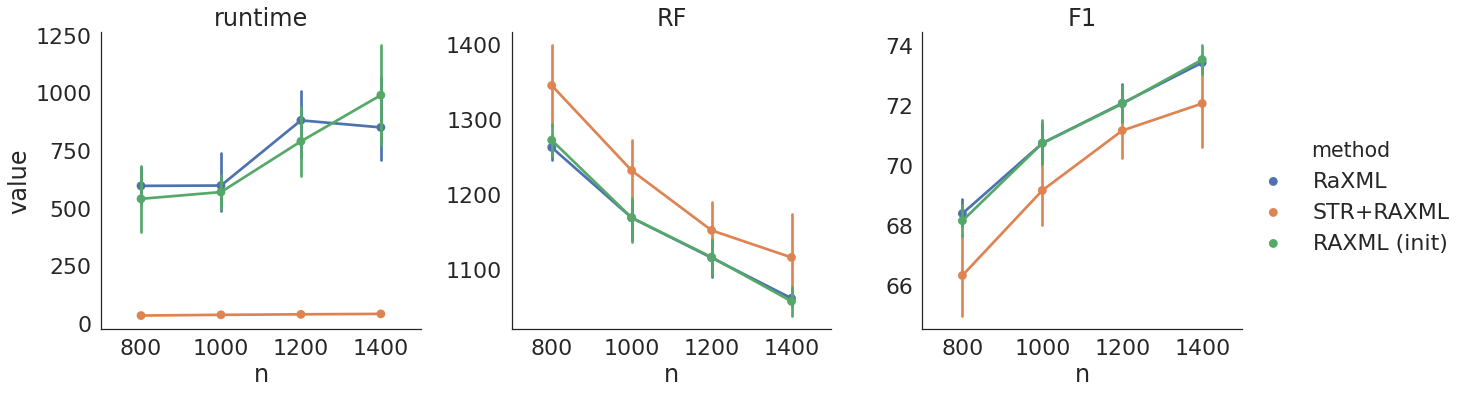

In [38]:
sns.set(style = "white", font_scale = 2)
sns.catplot(data = df_long, x = "n", y = "value", hue = "method", 
           col = "performance", legend = True, kind = "point", sharey = False, height = 6).set_titles("{col_name}")

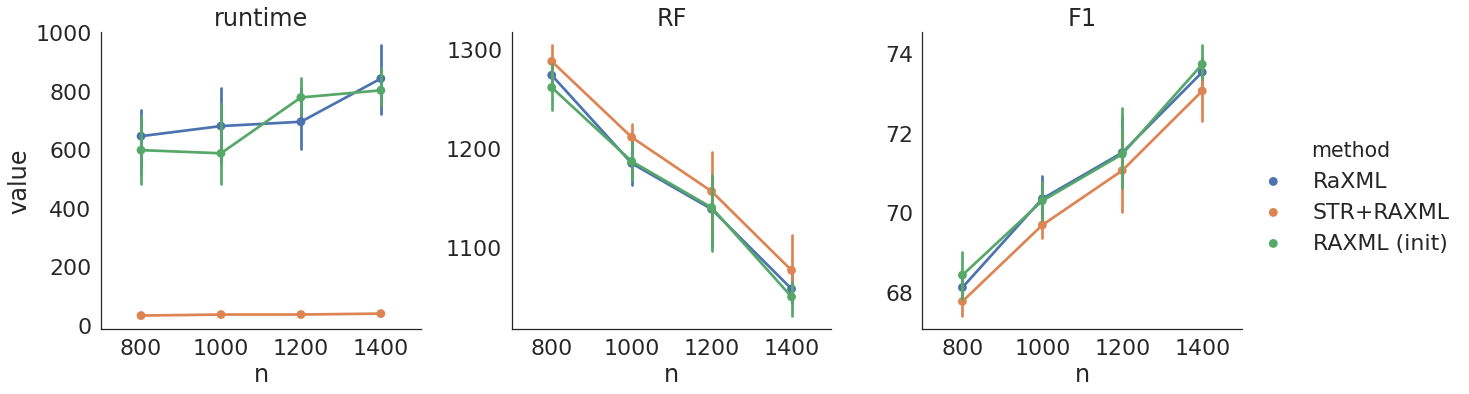

In [3]:
sns.set(style = "white", font_scale = 2)
sns.catplot(data = df_long, x = "n", y = "value", hue = "method", 
           col = "performance", legend = True, kind = "point", sharey = False, height = 6).set_titles("{col_name}")

In [6]:
# dendropy (for presentation)
import dendropy
import sys
sys.path.append("/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree")
import reconstruct_tree

tns = dendropy.TaxonNamespace()
s1 = "(((B,C),A),(D,E));"
tree1 = dendropy.Tree.get(
        data=s1,
        schema="newick",
        taxon_namespace= tns)

s2 = "(((A,B),C),(D,E));"
tree2 = dendropy.Tree.get(
        data=s2,
        schema="newick", taxon_namespace= tns)

RF,F1 = reconstruct_tree.compare_trees(tree1, tree2)

RF
F1

In [1]:
import sys, os
sys.path.append("/gpfs/ysm/project/kleinstein/mw957/repos/spectral-tree-inference/spectraltree")
import generation
import dendropy

tree_path = "../data/NY_H1N1.newick"
H1N1_tree = dendropy.Tree.get(path=tree_path, schema="newick")

In [30]:
observations, taxa_meta = generation.simulate_sequences(1000, tree_model=H1N1_tree, 
                                                        seq_model=generation.HKY(kappa = 2), mutation_rate=0.1, alphabet="DNA")

ValueError: 'sequences' length varies among nodes